## EDA checklist 

 1. Data shapes (train/test)

 2. Target distribution & transformation decision

 3. Missing values list + imputation strategy per column

 4. Outliers detected & action taken

 5. Top correlated features & features to drop

 6. List of engineered features + rationale

 7. Encoding choices + cardinality handling

 8. Scaling decisions per model family

 9. Save cleaned data & preprocessing code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/Housing.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Check null values

In [31]:
data.isnull().sum().sort_values(ascending=False).head(20)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Identify numeric & categorical features

In [40]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [43]:
print("Numeric Feature:  ",numeric_features)
print("Categorical Feature:  ",categorical_features)

Numeric Feature:   ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical Feature:   ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [36]:
print("Numeric Columns:", len(numeric_features))
print("Categorical Columns:", len(categorical_features))


Numeric Columns: 6
Categorical Columns: 7


## Univariate Analysis (Single Feature)
### For numeric columns:

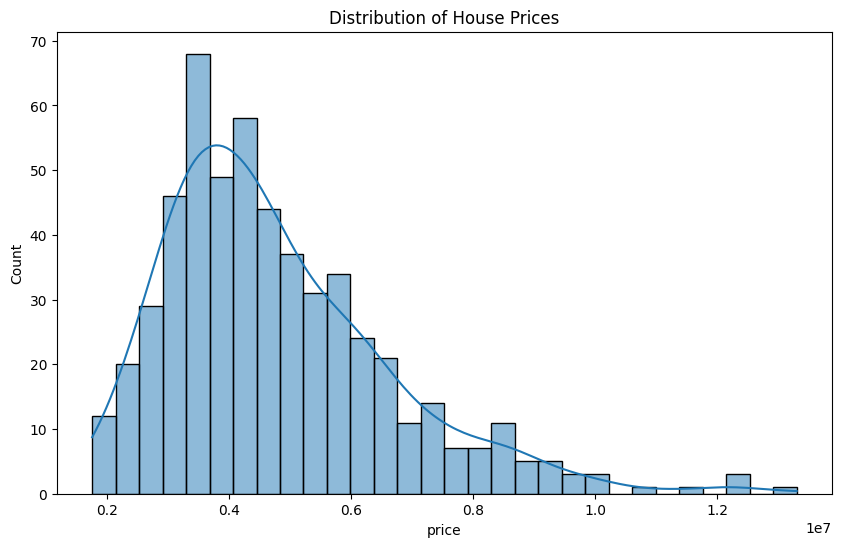

In [ ]:
# Histogram of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()


In [47]:
# check skewness and kurtosis
data['price'].skew(), data['price'].kurtosis()

(np.float64(1.2122388370279802), np.float64(1.9601302314151994))

### For categorical feature

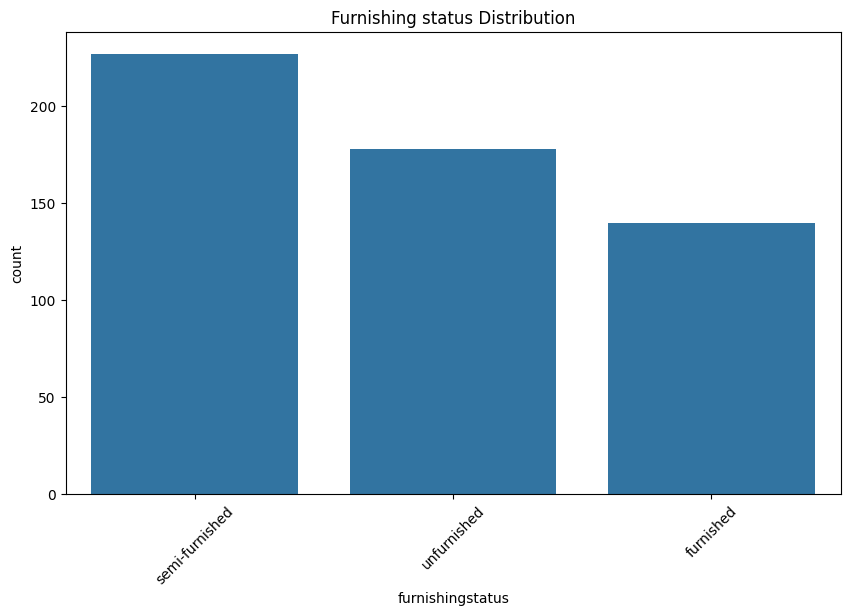

In [52]:
plt.figure(figsize=(10, 6 ))
sns.countplot(x="furnishingstatus", data=data, order=data['furnishingstatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Furnishing status Distribution')
plt.show()


## Bivariate Analysis (Feature vs Target)

## Numeric vs Target

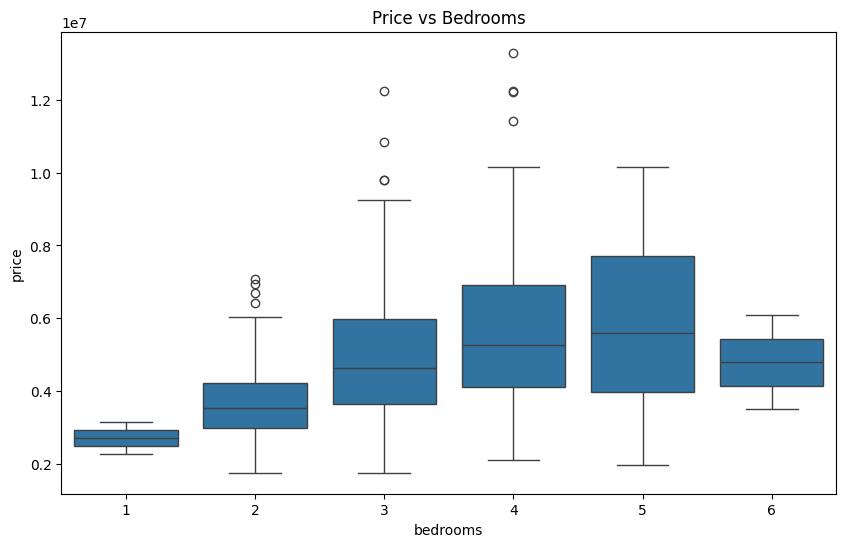

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price vs Bedrooms')
plt.show()

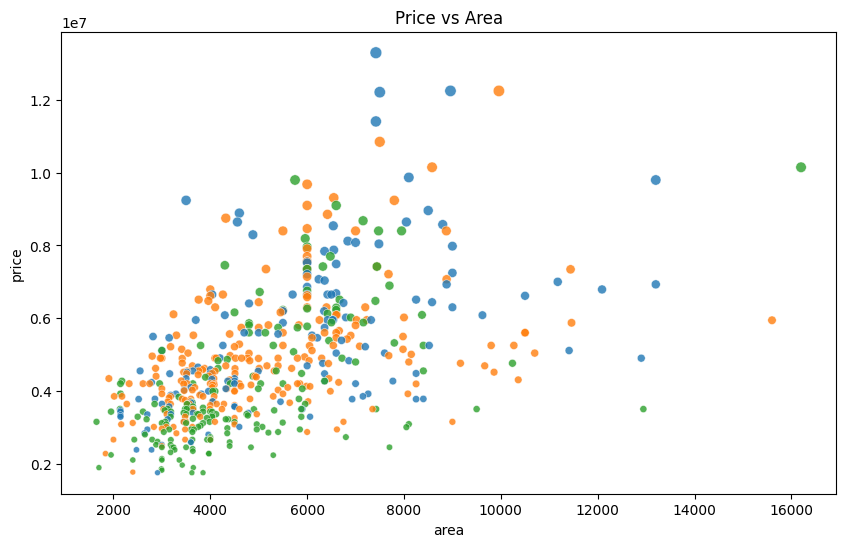

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='price', data=data, hue='furnishingstatus', size ='price', legend=False, alpha=0.8)
plt.title('Price vs Area')
plt.show()

### Categorical vs Target

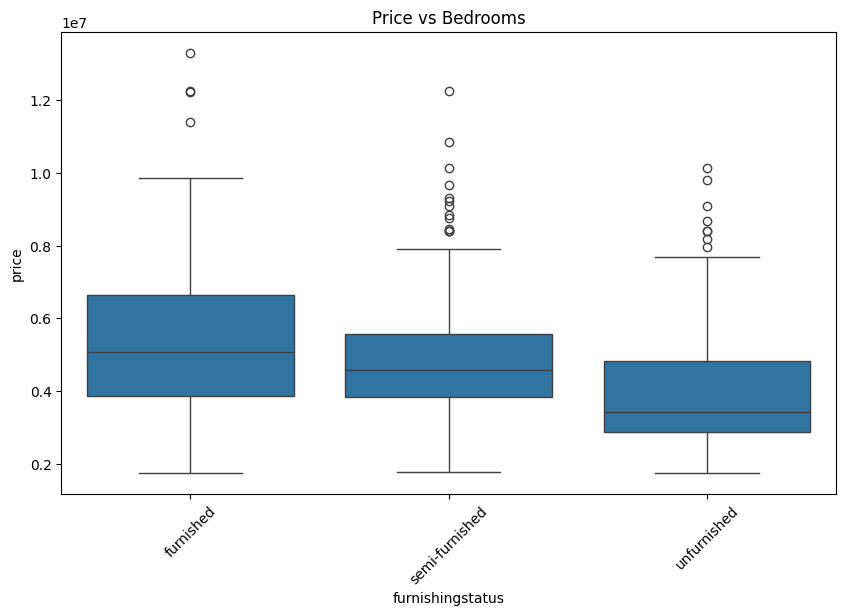

In [58]:
plt.figure(figsize=(10,6))
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.xticks(rotation=45)
plt.title('Price vs Bedrooms')
plt.show()

### Correlation Analysis

In [59]:
# compute the correlation matrix
corr = data.corr(numeric_only=True)

# Top correlated features with SalePrice
top_corr = corr['price'].abs().sort_values(ascending=False).head(10)
print("Top correlated features with Price:\n", top_corr)

Top correlated features with Price:
 price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


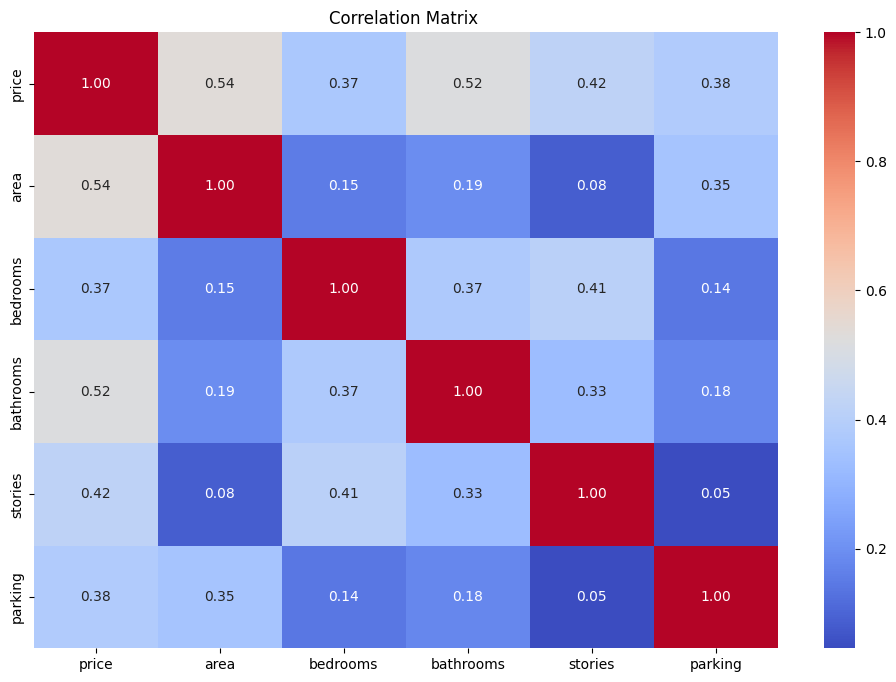

In [60]:
# Heatmap of correlations
plt.figure(figsize=(12, 8 ))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix ')
plt.show()

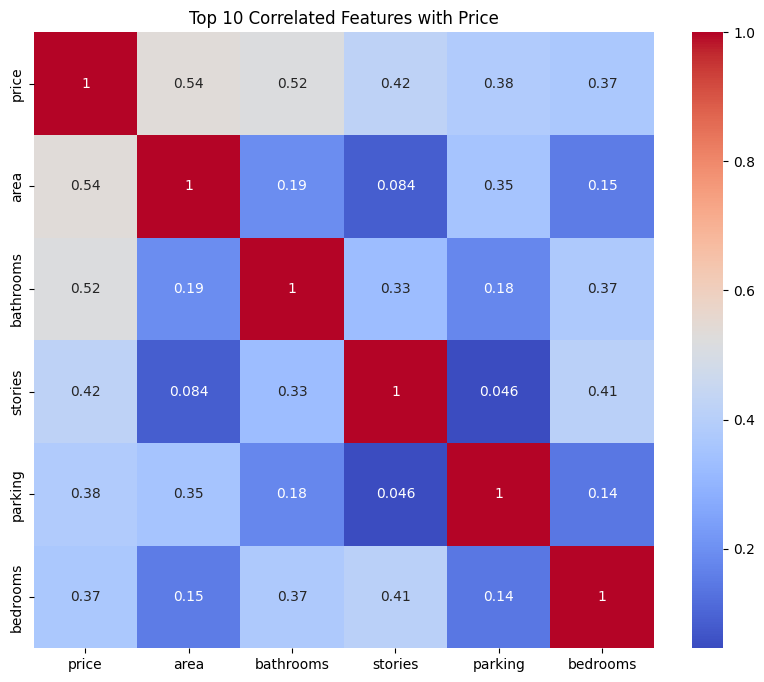

In [62]:
# Focused heatmap on top 10 correlated features
top_feature = top_corr.index
plt.figure(figsize=(10, 8))
sns.heatmap(data[top_feature].corr(), annot=True, cmap='coolwarm')
plt.title('Top 10 Correlated Features with Price')
plt.show()

<Axes: >

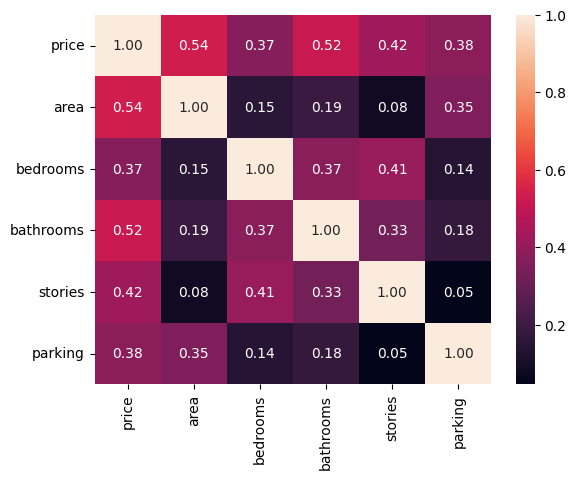

In [6]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

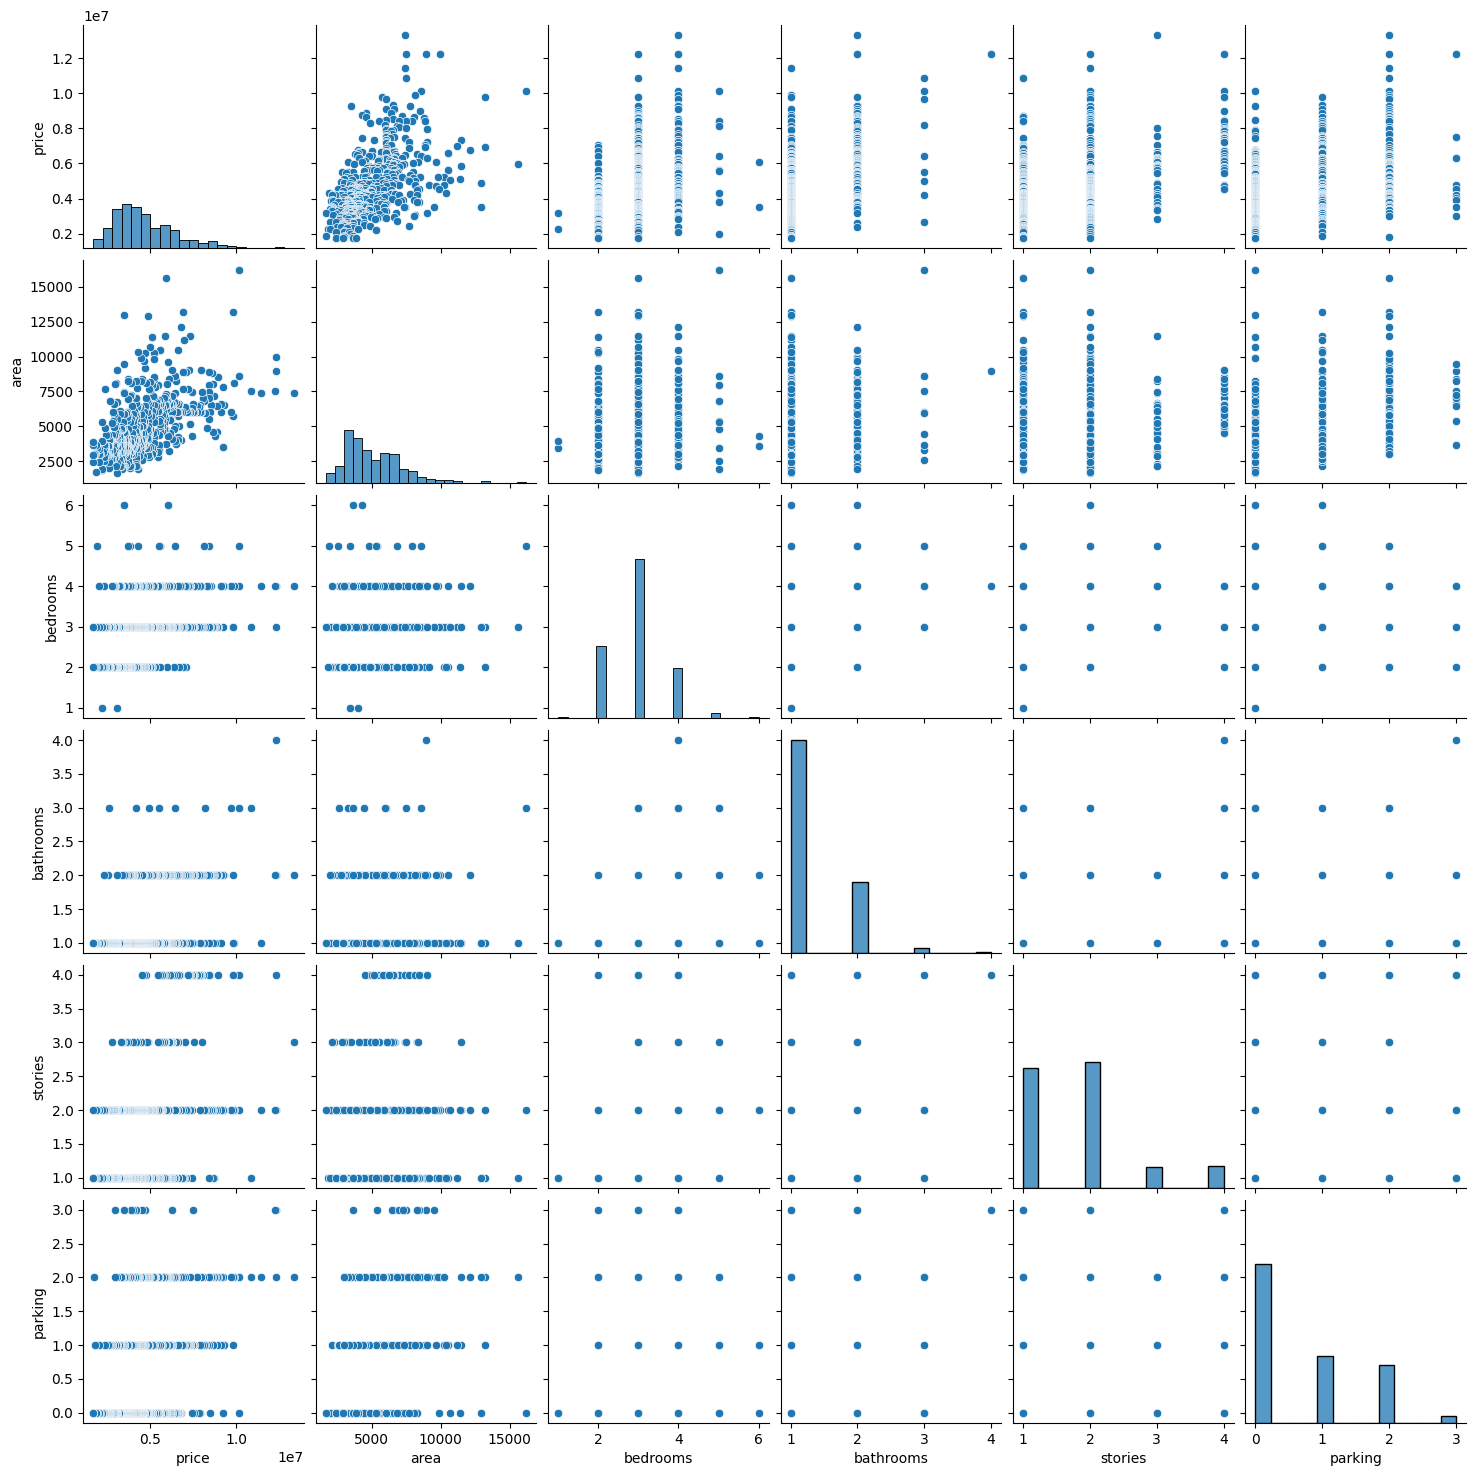

In [66]:
sns.pairplot(data)
plt.show()

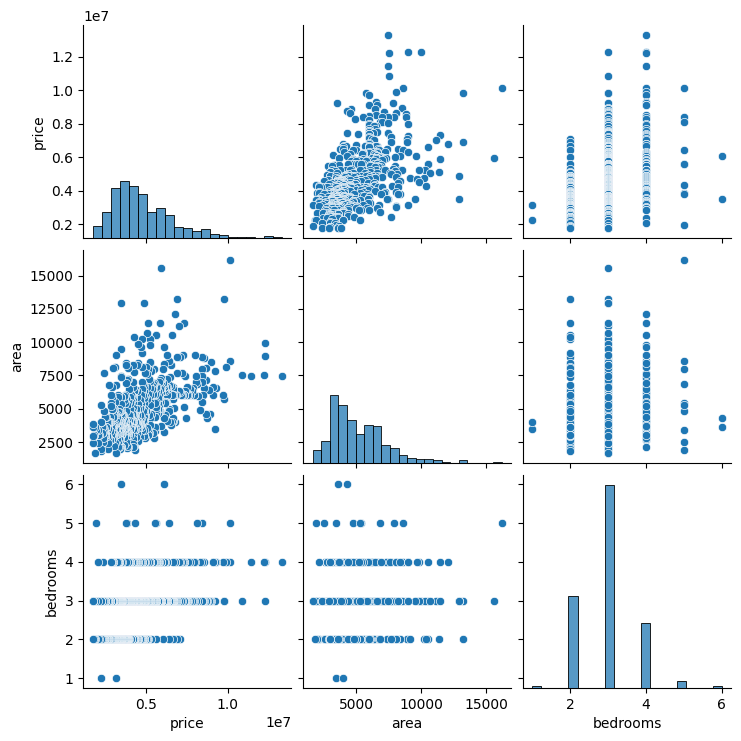

In [68]:
# Pairplot for top correlated features
sns.pairplot(data[['price', 'area', 'bedrooms']])
plt.show()

<Axes: ylabel='price'>

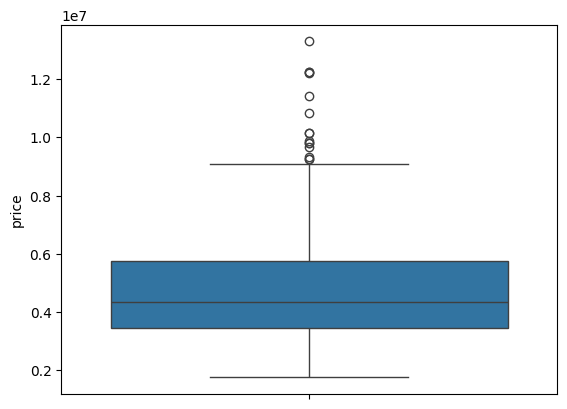

In [8]:
sns.boxplot(data['price'])

## Missing Values & Outliers

In [63]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Series([], dtype: int64)


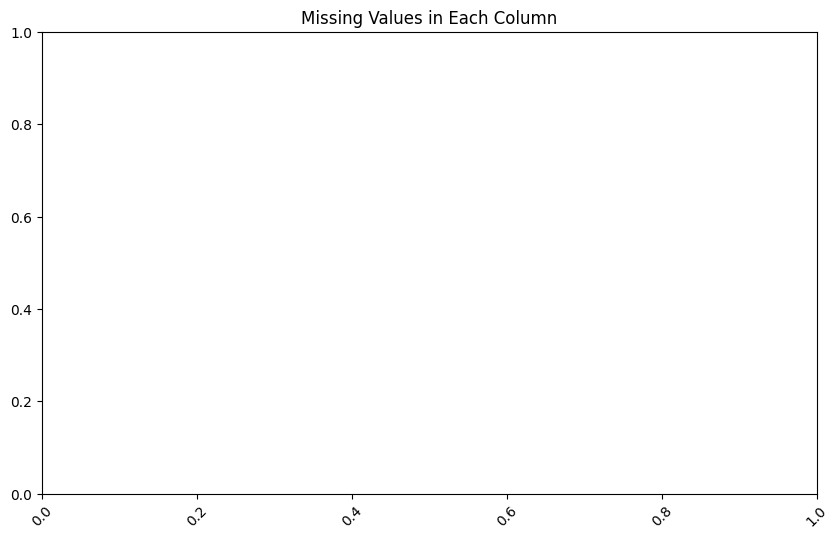

In [65]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45)
plt.title('Missing Values in Each Column')  
plt.show()

### Outlier detection using interqurtile range(IQR) 

In [11]:
iqr = data['area'].quantile(0.75) - data['area'].quantile(0.25)
lower_bound = data['area'].quantile(0.25) - 1.5 * iqr
upper_bound = data['area'].quantile(0.75) + 1.5 * iqr
outliers = data[ (data['area'] < lower_bound) | (data['area'] > upper_bound) ]
outliers.head(20)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished


In [30]:
outliers.count()

price               12
area                12
bedrooms            12
bathrooms           12
stories             12
mainroad            12
guestroom           12
basement            12
hotwaterheating     12
airconditioning     12
parking             12
prefarea            12
furnishingstatus    12
dtype: int64

## Remove outliers if enormous 

In [13]:
cleanded_data = data[ (data['area'] >= lower_bound) & (data['area'] <= upper_bound) ].copy()

### Using Cap

In [24]:
cleanded_data1 = data['area'].clip(lower = lower_bound, upper = upper_bound)

In [22]:
cleanded_data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [25]:
cleanded_data1.head(5)

0    7420
1    8960
2    9960
3    7500
4    7420
Name: area, dtype: int64

### Remove Outliers using z score (mean +/- 3 * std)

In [26]:
upper_threshold = data['area'].mean() + 3 * data['area'].std()
lower_threshold = data['area'].mean() - 3 * data['area'].std()
outliers_z = data[(data['area'] > upper_threshold) | (data['area'] < lower_threshold)] 

In [27]:
outliers_z.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished
403,3500000,12944,3,1,1,yes,no,no,no,no,0,no,unfurnished


In [28]:
outliers_z.count()

price               7
area                7
bedrooms            7
bathrooms           7
stories             7
mainroad            7
guestroom           7
basement            7
hotwaterheating     7
airconditioning     7
parking             7
prefarea            7
furnishingstatus    7
dtype: int64

<Axes: xlabel='stories', ylabel='price'>

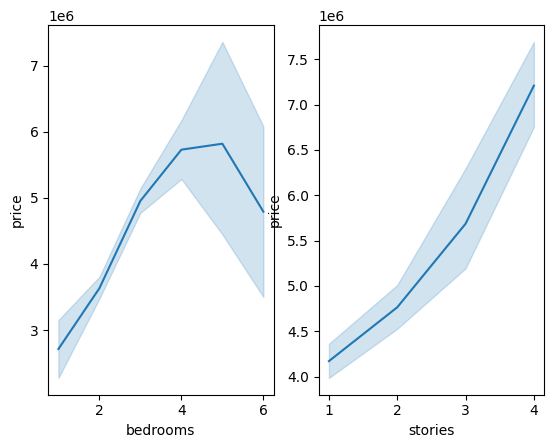

In [69]:
plt.subplot(1,2,1)
sns.lineplot(data=data,x='bedrooms',y='price')
plt.subplot(1,2,2)
sns.lineplot(data=data,x='stories',y='price')

In [70]:
data.sample()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
308,4165000,4046,3,1,2,yes,no,yes,no,no,1,no,semi-furnished


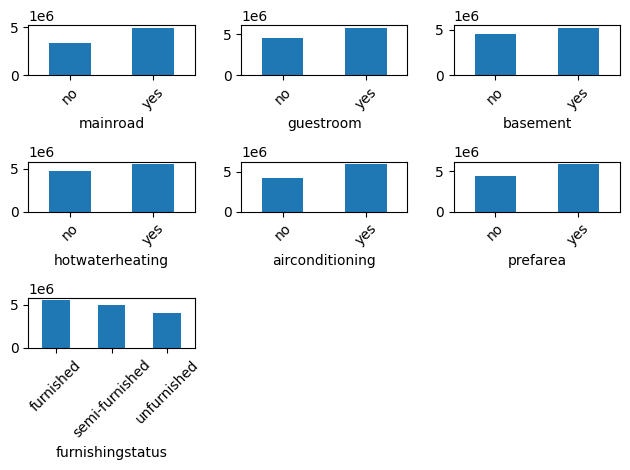

In [76]:
plt.subplot(3,3,1)
data.groupby('mainroad')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,2)
data.groupby('guestroom')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,3)
data.groupby('basement')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,4)
data.groupby('hotwaterheating')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,5)
data.groupby('airconditioning')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,6)
data.groupby('prefarea')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.subplot(3,3,7)
data.groupby('furnishingstatus')['price'].mean().plot(kind='bar')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

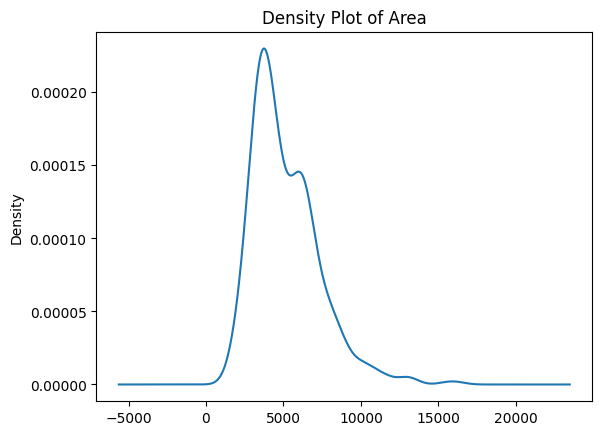

In [77]:
data['area'].plot(kind='kde')
plt.title('Density Plot of Area')
plt.show()